In [122]:
import pandas as pd
import numpy as np


In [123]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [124]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [126]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [127]:
train = train.drop(["Name", "Ticket", "Cabin"], axis=1)
test = test.drop(["Name", "Ticket", "Cabin"], axis=1)

In [128]:
new_train = pd.get_dummies(train)
new_test = pd.get_dummies(test)

In [129]:
new_train.isnull().sum().sort_values(ascending=False).head(10)

Age           177
Embarked_S      0
Embarked_Q      0
Embarked_C      0
Sex_male        0
Sex_female      0
Fare            0
Parch           0
SibSp           0
Pclass          0
dtype: int64

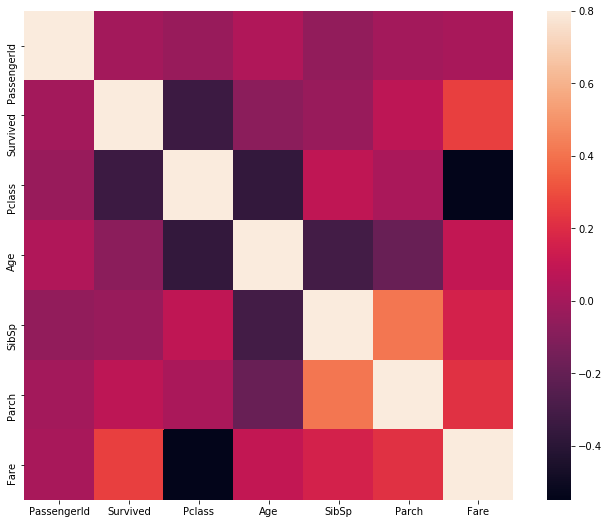

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat=train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [131]:
new_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [132]:
new_train["Age"].fillna(new_train["Age"].mean(), inplace=True)
new_test["Age"].fillna(new_test["Age"].mean(), inplace=True)

In [133]:
new_train["Fare"].fillna(new_train["Fare"].mean(), inplace=True)
new_test["Fare"].fillna(new_test["Fare"].mean(), inplace=True)

In [134]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.00,1,0,7.2500,S
1,2,1,1,female,38.00,1,0,71.2833,C
2,3,1,3,female,26.00,0,0,7.9250,S
3,4,1,1,female,35.00,1,0,53.1000,S
4,5,0,3,male,35.00,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.00,0,0,51.8625,S
7,8,0,3,male,2.00,3,1,21.0750,S
8,9,1,3,female,27.00,0,2,11.1333,S
9,10,1,2,female,14.00,1,0,30.0708,C


In [135]:
new_test.isnull().sum().sort_values(ascending=False).head(10)

Embarked_S    0
Embarked_Q    0
Embarked_C    0
Sex_male      0
Sex_female    0
Fare          0
Parch         0
SibSp         0
Age           0
Pclass        0
dtype: int64

In [136]:
X = new_train.drop("Survived", axis=1)
y = new_train["Survived"]

In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [138]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [139]:
Xtrain, Xvalidation, Ytrain, Yvalidation = train_test_split(X, y, test_size=0.2, random_state=True)

In [140]:
model = RandomForestClassifier(n_estimators=100,max_leaf_nodes=10,max_depth=10,random_state=0)
model.fit(Xtrain, Ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [141]:
from sklearn.metrics import accuracy_score
Yprediction = model.predict(Xvalidation)
accuracy_score(Yvalidation, Yprediction)

0.770949720670391

In [142]:
new_test.isnull().sum().sort_values(ascending=False).head(10)

Embarked_S    0
Embarked_Q    0
Embarked_C    0
Sex_male      0
Sex_female    0
Fare          0
Parch         0
SibSp         0
Age           0
Pclass        0
dtype: int64

In [143]:
submission = pd.DataFrame()

submission["PassengerId"] = new_test["PassengerId"]
submission["Survived"] = model.predict(new_test)

#We save the submission as a '.csv' file
submission.to_csv("submission.csv", index=False)

In [144]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
